In [1]:
import pythetatools.toyxp as toyxp
import pythetatools.likelihood as likelihood
from pythetatools.config import *
from pythetatools.config_visualisation import *
from pythetatools.config_fc import true_param_grid_sorted

from pythetatools.base_visualisation import show_minor_ticks
from pythetatools.file_manager import read_cont
from pythetatools.feldman_cousins import get_critical_values
from collections import defaultdict


import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
import uproot
import matplotlib.colors as colors
from matplotlib.ticker import LogLocator, NullFormatter
import pandas as pd

from matplotlib_inline.backend_inline import set_matplotlib_formats
set_matplotlib_formats('retina')
plt.style.use(t2k_style)

%load_ext autoreload
%autoreload 2

Welcome to JupyROOT 6.28/04


In [2]:
dir_ver = 'OA2023'
basedir = f"{inputs_dir}/{dir_ver}/MargTemplates"

smear_factor = 3.3e-5
smeared_postfix = {False: '', True: f'_smeared_{smear_factor}'}
mo_to_suffix = {0:'', 1:'_IH'}
mode_to_prefix = {0:'', 1:'statonly'}

outdir_path = f'{outputs_dir}/plots/{dir_ver}/dchi2'
os.makedirs(outdir_path, exist_ok=True)

In [3]:

def Plot_dchi2_surface(indir, FC_filetemplate=None, smeared=False,  save=False): 
    avnllh = {}
    for mo in [0, 1]:
        bin_edges, double_avnllh, param_names = read_cont(os.path.join(indir, f'hist{mo_to_suffix[mo]}{smeared_postfix[smeared]}.root'))
        avnllh[mo] = double_avnllh/2
    grid = [(bin_edges[i][1:]+bin_edges[i][:-1])/2 for i in range(len(bin_edges))]

    if len(param_names) == 2:
        mo_treat = 'conditional'
    else:
        mo_treat = 'joint'
        
    llh = likelihood.Loglikelihood(grid, avnllh, param_names, mo_treat=mo_treat)
    
    param_names_flattened = "".join(param_names)
    
    if FC_filetemplate is not None:
        crit_val_central_NO = get_critical_values(FC_filetemplate, param_names_flattened, true_param_grid_sorted[param_names_flattened], 0)
        crit_val_central_IO = get_critical_values(FC_filetemplate, param_names_flattened, true_param_grid_sorted[param_names_flattened], 1)
        critical_values=[crit_val_central_NO, crit_val_central_IO]
        x_critical_values = true_param_grid_sorted[param_names_flattened]
        show_const_critical = False
        ifFC = '_wFC_crit_values'
    else:
        x_critical_values = None
        critical_values = None
        show_const_critical = True
        ifFC = ''
        
    fig, ax = plt.subplots()
    
    llh.plot(ax, wtag=True, show_const_critical=show_const_critical, x_critical_values=x_critical_values, critical_values=critical_values)
    
    if save:
        fig.savefig(f"{outdir_path}/dchi2_{param_names_flattened}_main_{prefix}{ifFC}{mode_to_prefix[mode]}.eps", bbox_inches='tight')
        fig.savefig(f"{outdir_path}/dchi2_{param_names_flattened}_main_{prefix}{ifFC}{mode_to_prefix[mode]}.pdf", bbox_inches='tight')
        fig.savefig(f"{outdir_path}/dchi2_{param_names_flattened}_main_{prefix}{ifFC}{mode_to_prefix[mode]}.png", bbox_inches='tight', dpi=300)
        fig.savefig(f"{outdir_path}/dchi2_{param_names_flattened}_main_{prefix}{ifFC}{mode_to_prefix[mode]}.svg", bbox_inches='tight')


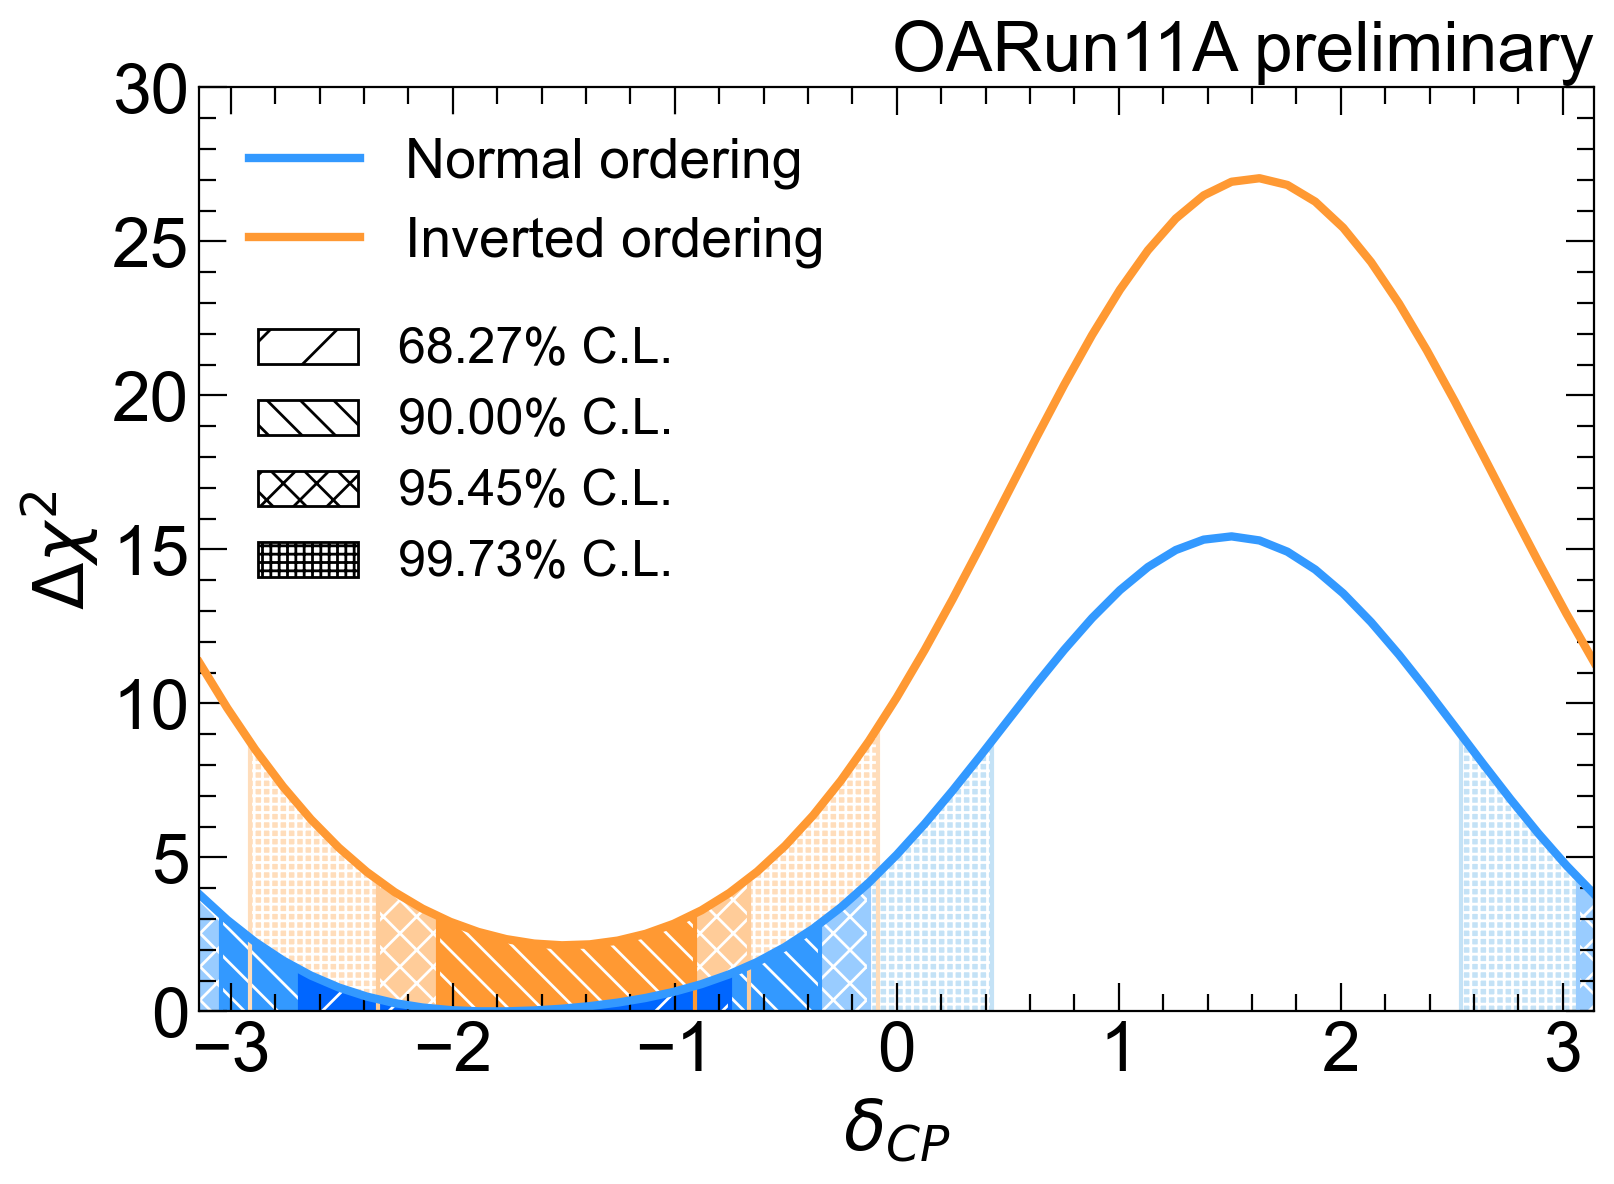

In [4]:
smeared = False
indir = f"{basedir}/MargTemplates_DataFit_delta_100k_p-theta_mode_0"
prefix = 'DataFit'
FC_filetemplate = f'{outputs_dir}/files/{dir_ver}/FC/'+'CriticalDchi2_{param_name_flattened}_{true_param}_truemh{mh}.npy'

Plot_dchi2_surface(indir, FC_filetemplate=FC_filetemplate, smeared=False, save=False)

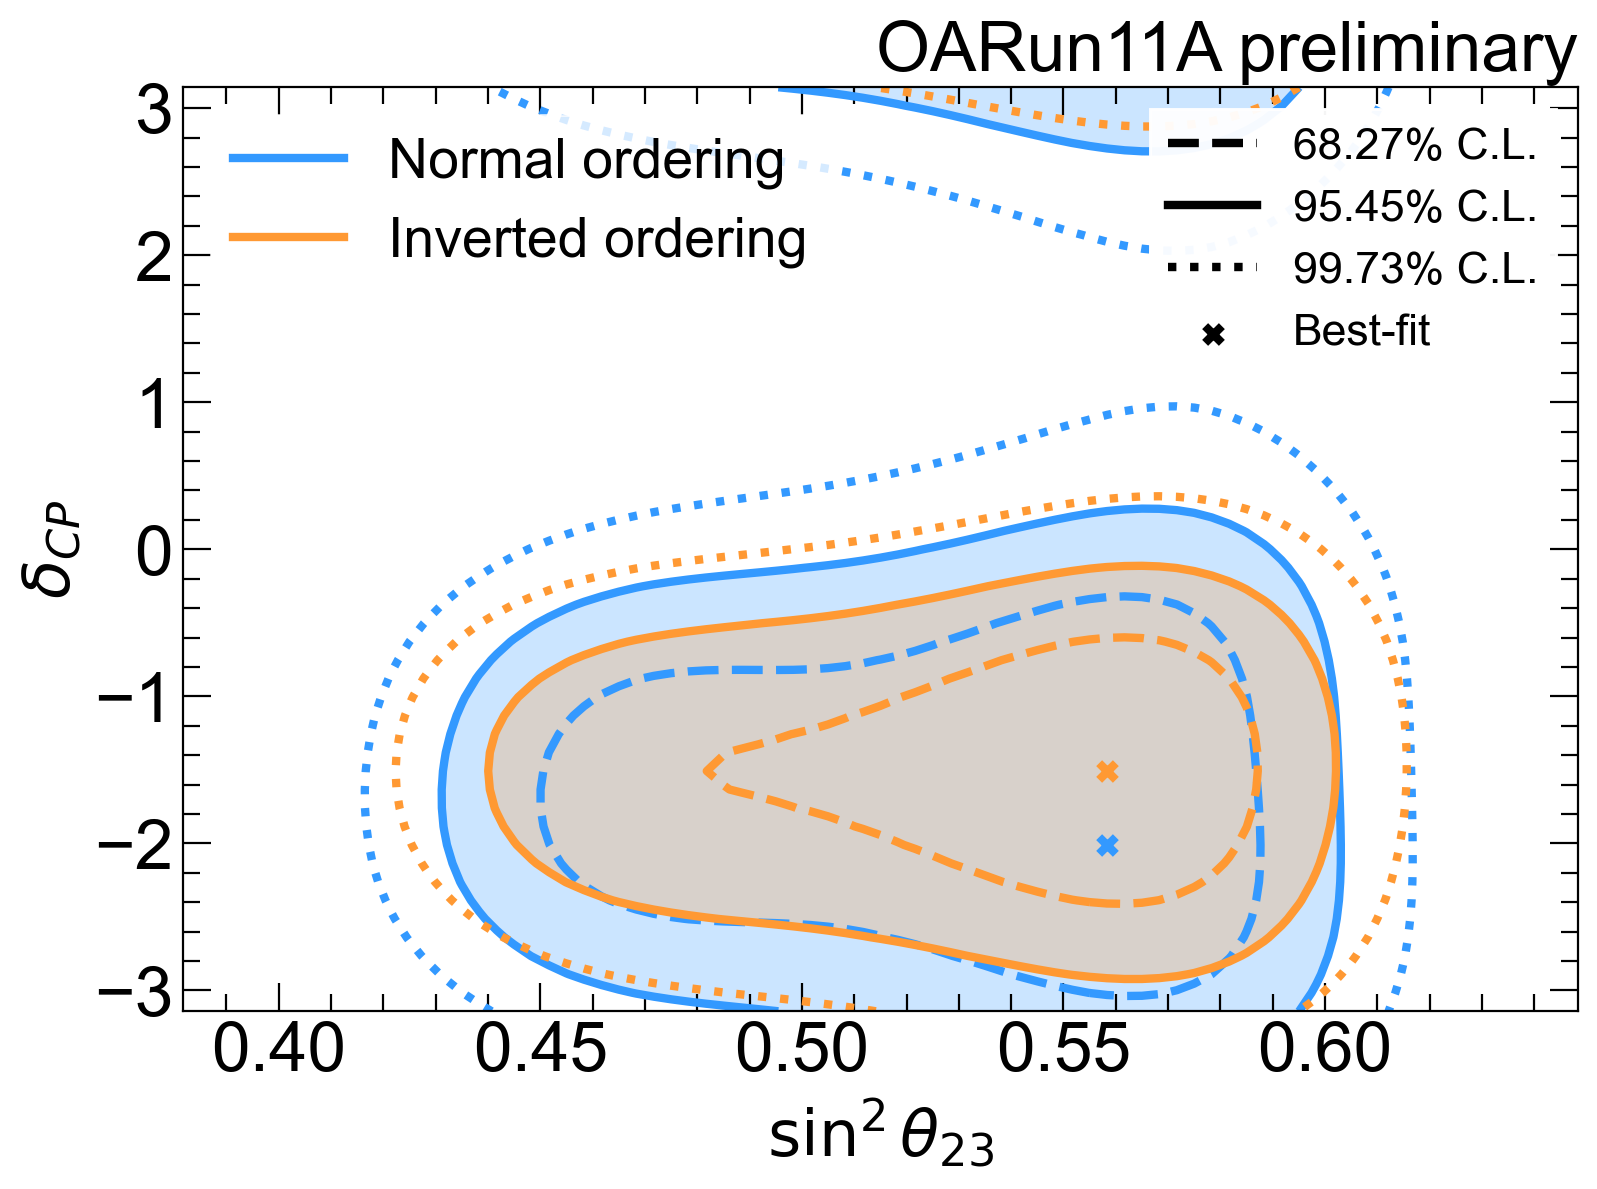

In [5]:
smeared = False
indir = f"{basedir}/MargTemplates_DataFit_sin223_delta_100k_p-theta_mode_0"
prefix = 'DataFit'
FC_filetemplate = None

Plot_dchi2_surface(indir, FC_filetemplate=FC_filetemplate, smeared=False, save=False)